<a href="https://colab.research.google.com/github/DipankarJDutta/DipankarJDutta-Biomarker-discovery-from-B-T-cells-in-FASD-GDM-with-LSTM/blob/Feature-extraction-with-Shap/LSTM_Shap-values_samples%20ranked%20by%20LI_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Fixing random seed to 007 for reproducibility
from numpy.random import seed
seed(7)
from tensorflow import set_random_seed
set_random_seed(7)

In [0]:
# Importing essentials
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# Load data
dataset = pd.read_csv('Shap values_LSTM_LI.csv')

In [4]:
# Display all data
dataset.head(56)

,Tnfaip3,Chchd7,Gnas,Pld4,Rasa1,Dapp1,Mtpap,Ttc3,Stk38,Ets1,Rars2,Wdr43,Bin1,Brox,Ddx50,Kdm7a,Mapk9,Ms4a6b,Zfp639,Celf2,Setdb2,2310001H17Rik,Umps,Tcrg-C4,Ptcd3,Ets1.1,Wac,Tvp23b,Usp15
0,0.002260,-0.010800,0.000331,-0.000426,-2.670000e-04,-0.002690,-0.01560,-0.003630,-0.000162,-0.002020,-0.002420,0.008280,0.000547,0.000720,0.000635,-0.02690,-0.001750,0.002020,0.006520,0.012600,0.027400,-0.055600,0.001780,-0.001470,-0.005760,-0.017500,0.008480,-0.011800,0.031800
1,0.002080,0.015200,-0.000009,0.000116,-8.500000e-05,0.001350,-0.02200,-0.005280,-0.002150,-0.001740,-0.004250,-0.000959,-0.001150,0.001890,-0.000206,0.00271,0.000292,-0.001410,0.005090,-0.001850,-0.012800,-0.045500,-0.000609,-0.001380,0.001020,0.000975,-0.002410,0.002210,0.001310
2,0.002070,-0.004840,-0.000497,-0.000132,-2.050000e-04,0.001330,-0.02190,-0.001570,0.000116,-0.000796,0.001850,0.011200,-0.001140,0.001910,0.000601,-0.02580,0.000326,-0.000656,-0.006130,-0.001890,0.007720,-0.036200,-0.000663,-0.001380,0.001000,0.003290,0.000351,0.002230,-0.002500
3,-0.007290,0.038200,0.000965,-0.009450,6.940000e-04,-0.011700,0.07660,-0.034400,0.015200,0.010500,-0.012900,-0.037800,0.005080,-0.007690,-0.004140,0.05060,-0.000254,-0.001620,0.005850,-0.002450,-0.015500,-0.030700,0.000090,-0.001690,0.000780,0.000369,-0.002960,-0.000096,-0.009030
4,-0.007700,0.040400,0.000916,-0.009680,7.070000e-04,-0.011900,0.08080,-0.036200,0.015800,0.011300,-0.013700,-0.039800,0.005320,-0.008250,-0.004370,0.05340,-0.000005,-0.000528,0.004450,-0.001240,0.011400,-0.032200,-0.000514,-0.000007,-0.000296,-0.000593,-0.003160,-0.001460,-0.009570
5,-0.001460,0.015700,0.000373,0.000656,-2.260000e-04,-0.000159,-0.02260,0.005810,-0.002180,0.000776,0.001900,-0.019800,-0.001180,0.001980,0.000622,-0.02650,0.000105,0.000577,0.005770,-0.001970,-0.013100,0.013600,-0.000751,0.001370,-0.001460,-0.005110,-0.001620,-0.005980,-0.003900
6,0.002160,0.015800,-0.000469,0.000641,3.020000e-04,-0.000720,-0.02280,0.005910,0.005830,0.001440,0.001950,-0.022800,0.002180,-0.001800,-0.001460,-0.02680,0.000016,0.001580,-0.006400,-0.001310,-0.002370,-0.004430,0.000073,0.003050,-0.002290,-0.003800,-0.000553,0.002310,0.000488
7,-0.002650,0.002630,-0.000375,0.000666,8.700000e-05,0.000901,-0.02440,-0.022500,-0.000952,0.000667,0.002160,0.002810,0.000145,0.002250,0.000083,0.02350,0.000067,-0.000472,-0.006780,-0.001310,-0.004540,0.015000,0.000182,-0.001600,0.000384,-0.000603,-0.000978,0.002510,-0.004800
8,0.002190,0.004700,-0.000460,0.000657,-2.000000e-04,-0.000856,-0.02310,0.000687,0.000545,0.000429,0.001990,-0.011300,-0.001220,-0.001840,0.000127,-0.01190,0.000407,0.000318,0.003370,-0.002050,0.003070,-0.006340,-0.000092,-0.001490,-0.000789,-0.002090,0.000658,0.002340,-0.003200
9,0.002300,-0.002130,-0.000345,-0.000524,-2.700000e-04,-0.000971,-0.01840,0.003850,-0.001530,-0.002650,0.002060,0.011600,-0.001320,-0.000068,0.000648,-0.02780,-0.002130,0.001880,0.006630,0.013600,0.028400,-0.057800,0.002230,-0.001550,-0.005690,-0.018200,0.008150,-0.012200,0.033300


In [5]:
# Describe the data; 56 samples, range of 0 to 1 (not z-scored)
dataset.describe()

,Tnfaip3,Chchd7,Gnas,Pld4,Rasa1,Dapp1,Mtpap,Ttc3,Stk38,Ets1,Rars2,Wdr43,Bin1,Brox,Ddx50,Kdm7a,Mapk9,Ms4a6b,Zfp639,Celf2,Setdb2,2310001H17Rik,Umps,Tcrg-C4,Ptcd3,Ets1.1,Wac,Tvp23b,Usp15
count,5.600000e+01,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,56.000000,5.600000e+01,5.600000e+01,56.000000
mean,2.535714e-07,-0.000002,2.535714e-08,1.982143e-07,8.689286e-08,-3.571429e-09,0.000002,-4.956353e-19,2.446429e-07,6.875000e-07,-1.303571e-07,8.214286e-07,-2.678571e-07,1.607143e-07,2.000000e-07,0.000003,9.428571e-08,-1.160714e-07,-1.607143e-07,9.642857e-07,7.321429e-07,-0.000007,1.582143e-07,4.107143e-09,2.500000e-07,-0.000001,3.589286e-07,2.446429e-07,0.000002
std,2.828109e-03,0.012648,4.153256e-04,2.144101e-03,2.670659e-04,2.757611e-03,0.026522,9.496353e-03,3.680631e-03,3.147701e-03,3.583937e-03,1.330805e-02,1.587225e-03,2.424804e-03,1.071682e-03,0.023119,8.051563e-04,1.308562e-03,5.537112e-03,5.408511e-03,1.487499e-02,0.030179,9.601229e-04,2.129044e-03,2.428862e-03,0.007618,3.702347e-03,5.446381e-03,0.013471
min,-7.700000e-03,-0.018200,-6.240000e-04,-9.680000e-03,-3.260000e-04,-1.190000e-02,-0.024800,-3.620000e-02,-2.740000e-03,-3.200000e-03,-1.370000e-02,-3.980000e-02,-1.400000e-03,-8.250000e-03,-4.370000e-03,-0.027900,-2.360000e-03,-1.860000e-03,-6.850000e-03,-4.360000e-03,-1.660000e-02,-0.062900,-1.330000e-03,-1.700000e-03,-6.100000e-03,-0.019800,-3.790000e-03,-1.330000e-02,-0.013300
25%,-1.820000e-03,-0.007970,-3.630000e-04,-4.392500e-04,-1.622500e-04,-7.050000e-04,-0.019275,-2.027500e-03,-2.157500e-03,-1.962500e-03,-1.212500e-03,-8.720000e-03,-1.132500e-03,-1.195000e-03,-2.597500e-04,-0.025725,-5.410000e-05,-1.362500e-03,-6.122500e-03,-3.230000e-03,-1.370000e-02,-0.026475,-6.232500e-04,-1.402500e-03,-8.045000e-04,-0.001902,-2.325000e-03,-1.325000e-03,-0.008130
50%,1.915000e-03,-0.002250,-7.595000e-05,5.985000e-04,-6.100000e-05,7.320000e-04,-0.012800,2.655000e-03,-9.610000e-04,-1.100000e-03,1.875000e-03,4.950000e-03,-6.475000e-04,3.895000e-04,3.250000e-04,0.000900,3.090000e-04,7.175000e-05,3.050000e-03,-1.950000e-03,-1.369000e-03,0.010200,-3.350000e-04,-1.230000e-03,6.545000e-04,0.001405,-1.155000e-03,2.305000e-03,-0.004550
75%,2.140000e-03,0.005490,3.272500e-04,1.232500e-03,5.125000e-05,1.460000e-03,0.013400,6.240000e-03,4.625000e-04,1.245000e-03,2.222500e-03,1.130000e-02,5.522500e-04,1.895000e-03,6.552500e-04,0.015950,4.870000e-04,1.005000e-03,5.095000e-03,-9.327500e-04,9.735000e-03,0.026900,1.905000e-04,1.557500e-03,2.087500e-03,0.005352,3.587500e-04,4.252500e-03,0.000915
max,2.370000e-03,0.040400,9.650000e-04,1.550000e-03,1.220000e-03,2.100000e-03,0.080800,7.970000e-03,1.580000e-02,1.130000e-02,2.780000e-03,1.380000e-02,5.320000e-03,2.320000e-03,8.200000e-04,0.053400,9.070000e-04,2.130000e-03,7.290000e-03,1.480000e-02,3.110000e-02,0.032800,2.510000e-03,6.770000e-03,2.420000e-03,0.008790,9.110000e-03,5.080000e-03,0.036400


In [0]:
# Set Seaborn Style defaults
sns.set(style = 'ticks', font= 'sans-serif', font_scale=1.25)

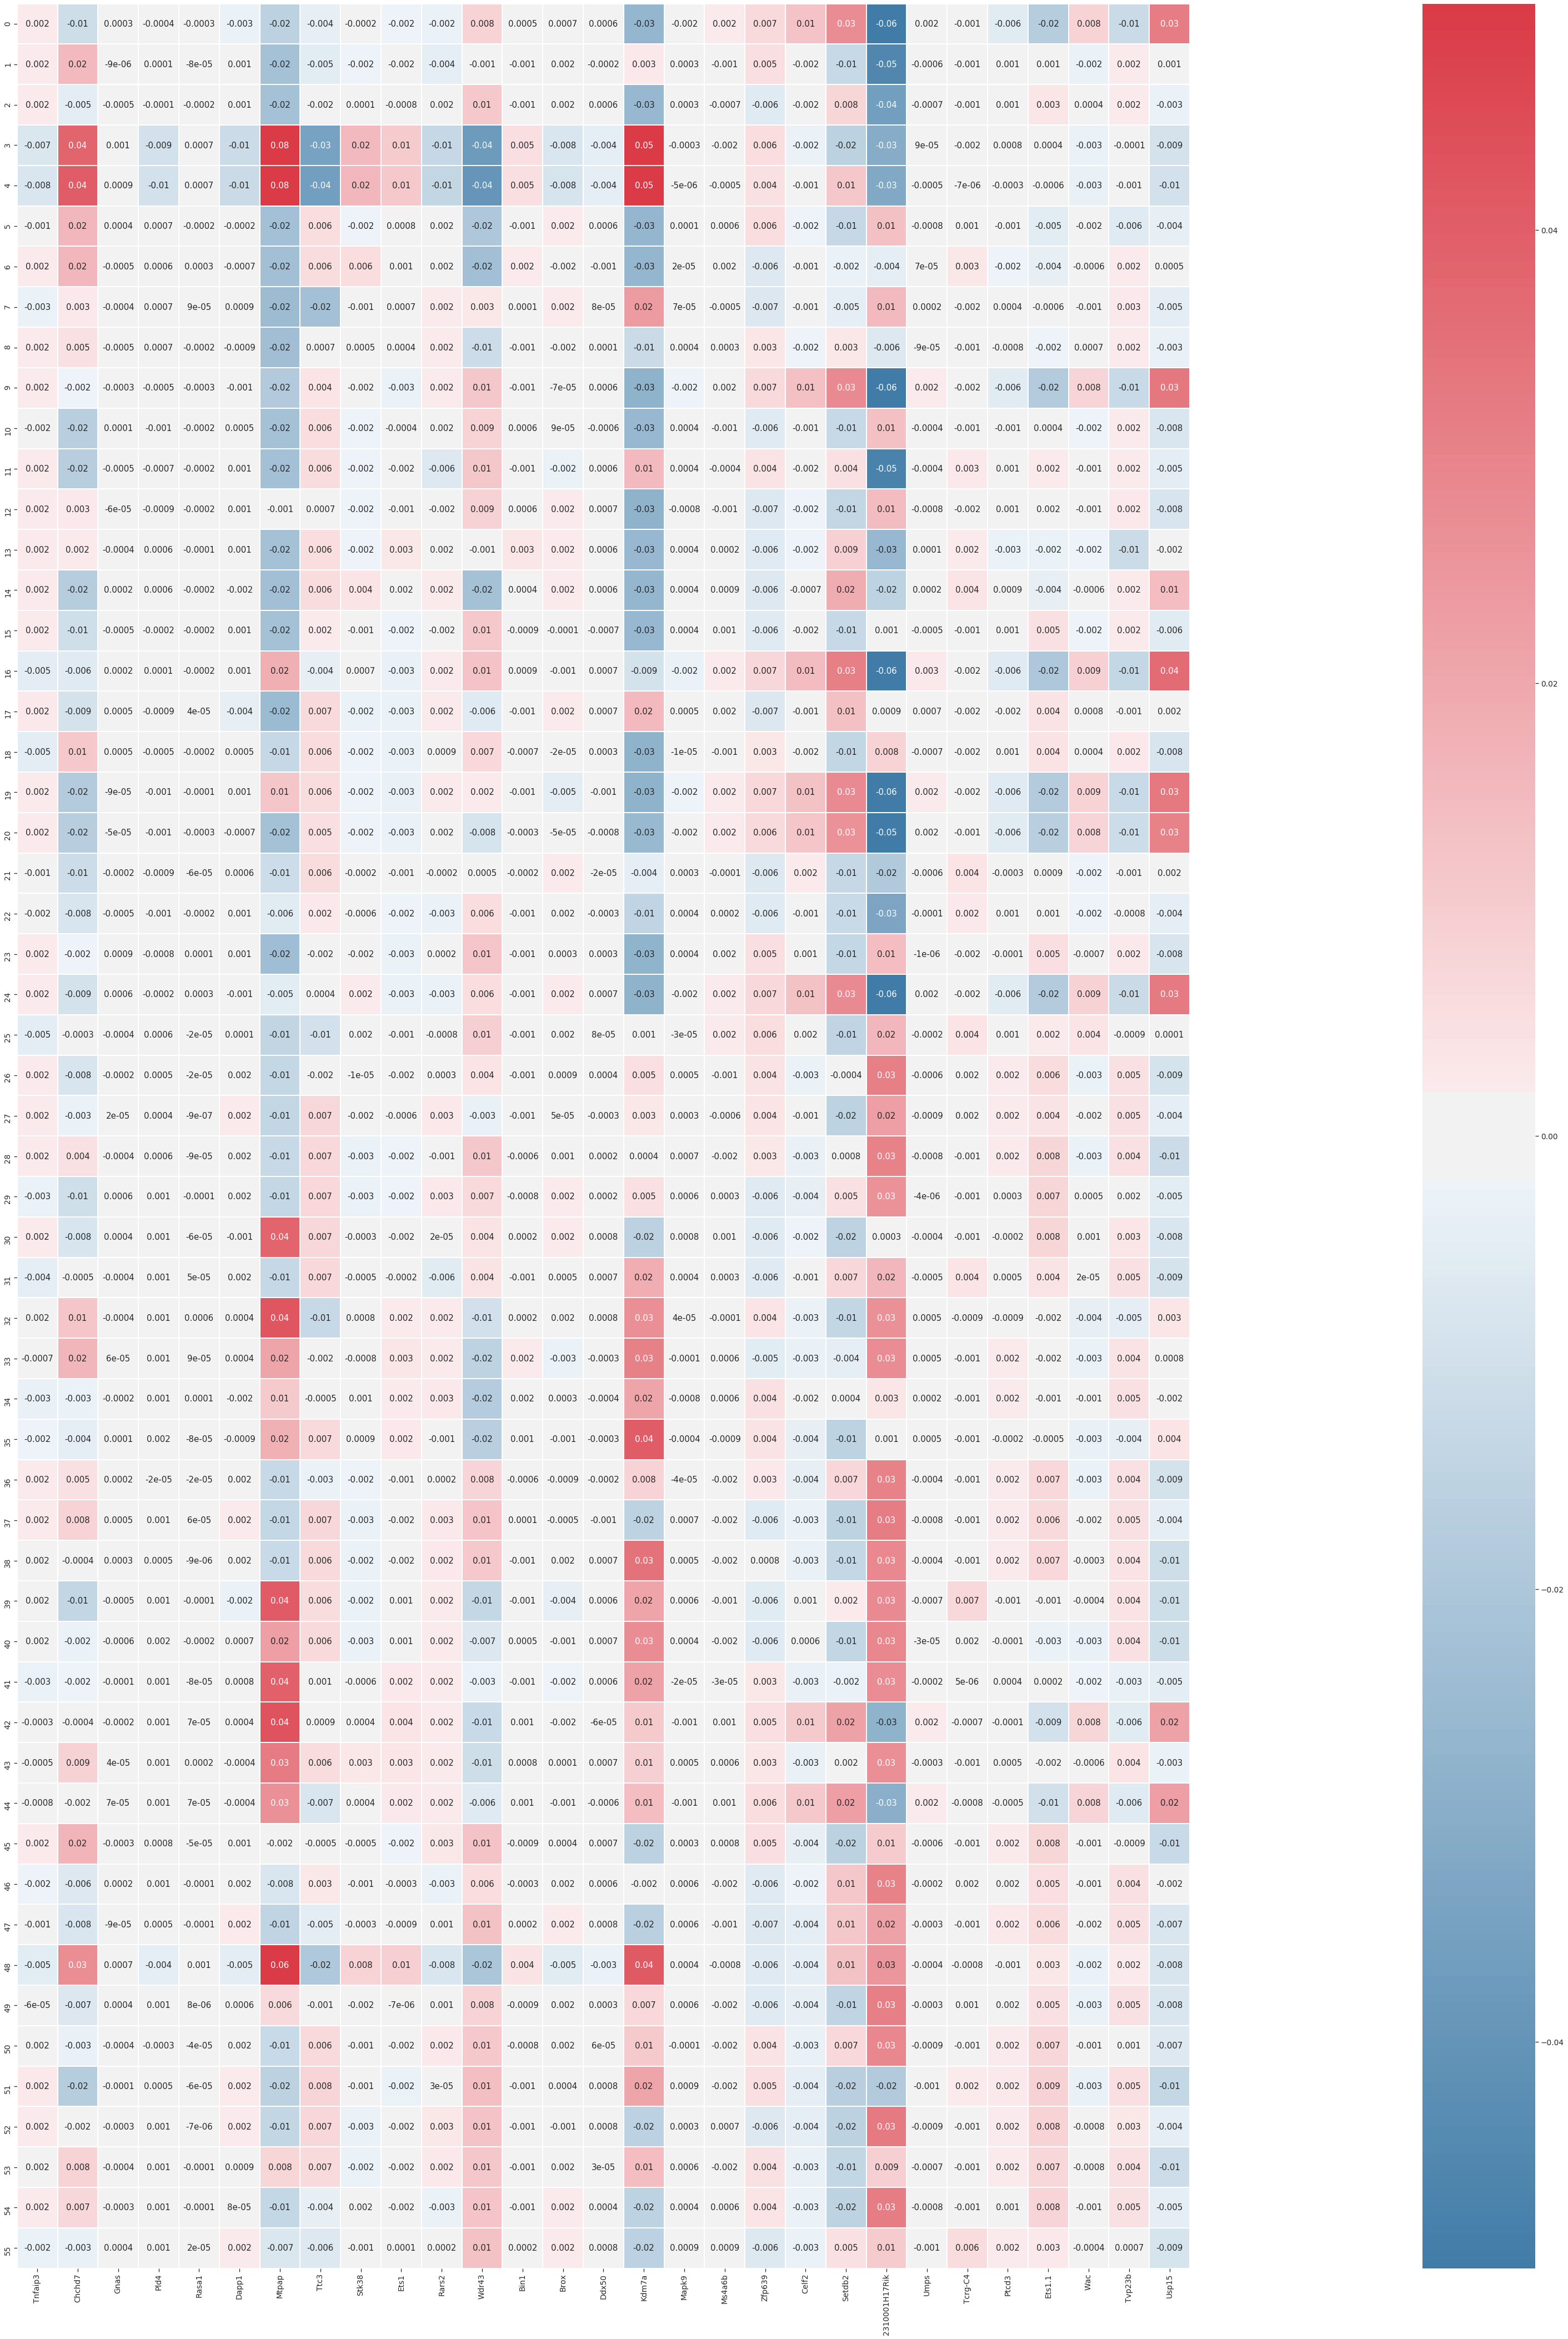

In [7]:
#Set up Matplotlib figure
f,ax = plt.subplots(figsize=(150, 75))

# Specify colors
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plotting the heatmap with the correct aspect ratio
sns.heatmap(dataset, linewidths=1, linecolor = 'white', cmap=cmap, center=0, square=True, vmin = -0.05, vmax = 0.05, cbar_kws={'shrink':1}, annot = True, fmt='0.1g' )

#Save figure as svg
plt.savefig ('Heatmap_shap_LSTM_ranked by LI.svg', format = 'svg')

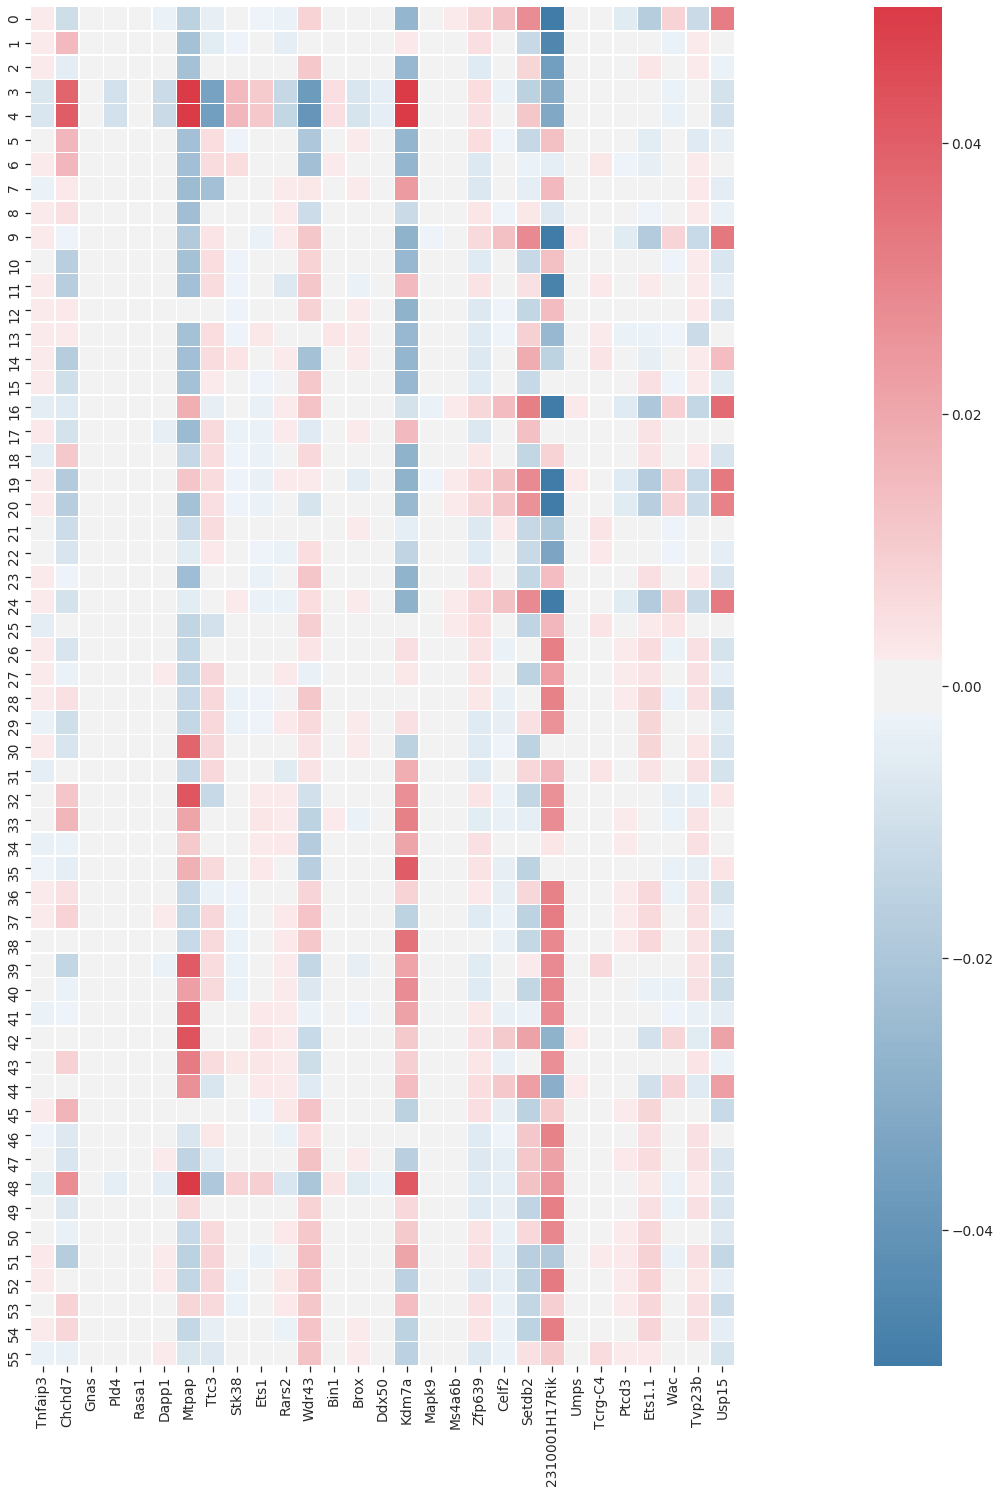

In [8]:
#No annotations inside cells

#Set up Matplotlib figure
f,ax = plt.subplots(figsize=(50,25))

# Specify colors
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plotting the heatmap with the correct aspect ratio
sns.heatmap(dataset, linewidths=0.5, linecolor = 'white', cmap=cmap, center=0, vmin = -0.05, vmax = 0.05, square=True, cbar_kws={'shrink':1})

#Save figure as svg
plt.savefig ('Heatmap_shap_LSTM_ranked by LI_no annot.svg', format = 'svg')

In [0]:
# Load learner Index data
data = pd.read_csv('Shap values_LSTM - LI-only.csv')

In [32]:
# Display learner Index data
data.head(56)

,Learning Index
0,-2.8
1,-2.2
2,-2.2
3,-2.2
4,-2.2
5,-1.0
6,-1.0
7,-0.8
8,-0.8
9,0.0


In [33]:
# Describe the Learner Index data
data.describe()

,Learning Index
count,56.000000
mean,2.600000
std,2.795581
min,-2.800000
25%,0.400000
50%,2.800000
75%,5.400000
max,7.400000


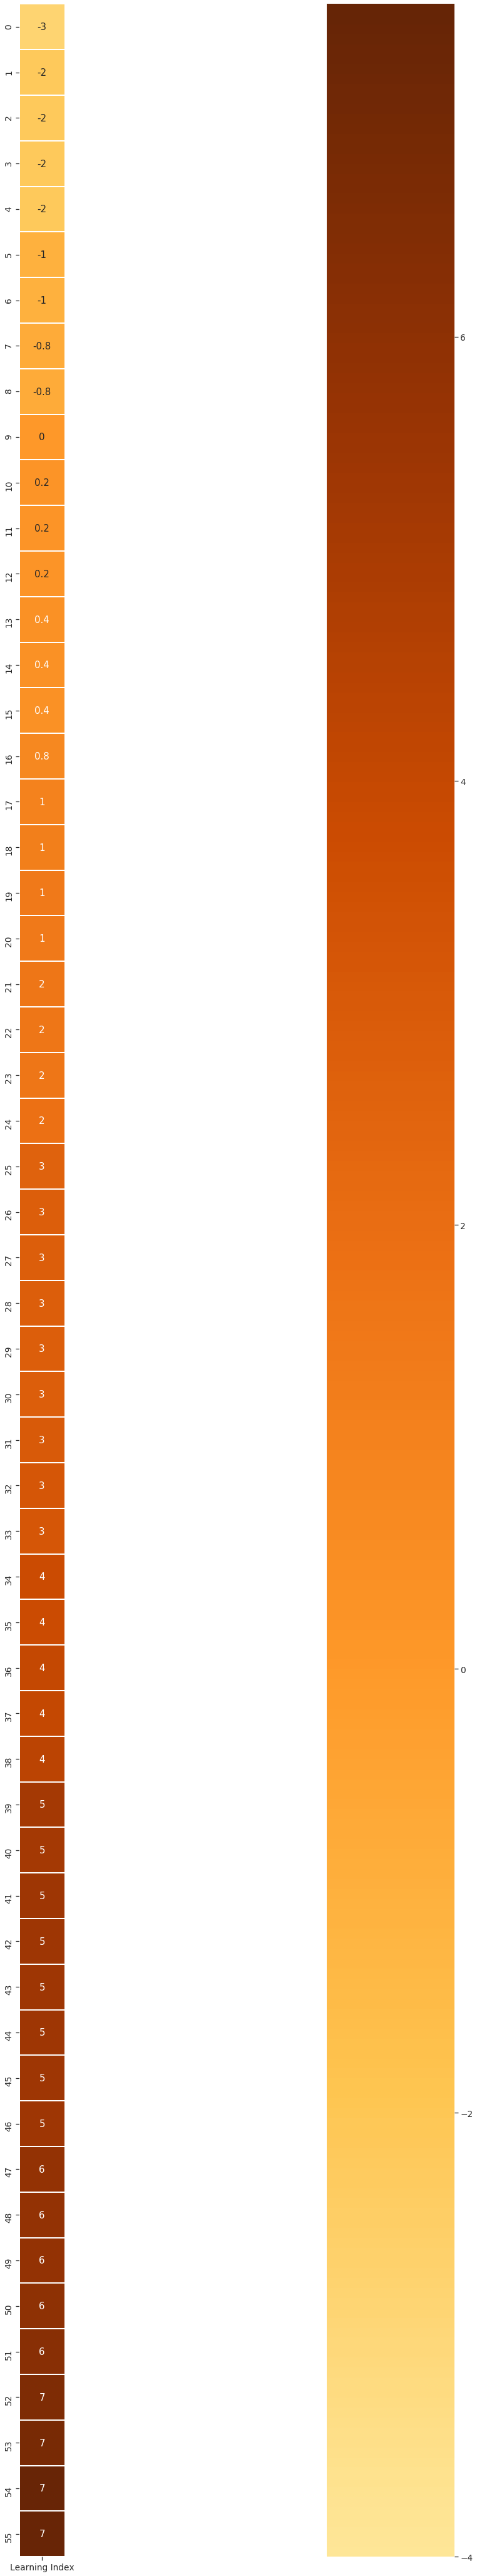

In [34]:
# Plot Learner Index data heatmap separately
# Set up Matplotlib figure
f,ax = plt.subplots(figsize=(150, 75))

# Plotting the heatmap with the correct aspect ratio
sns.heatmap(data, linewidths=1, linecolor = 'white', center=0, square=True, cmap = "YlOrBr", vmin = -4, vmax = 7.5, cbar_kws={'shrink':1}, annot = True, fmt='0.1g' )

#Save figure as svg
plt.savefig ('Heatmap_shap_LSTM_LI.svg', format = 'svg')

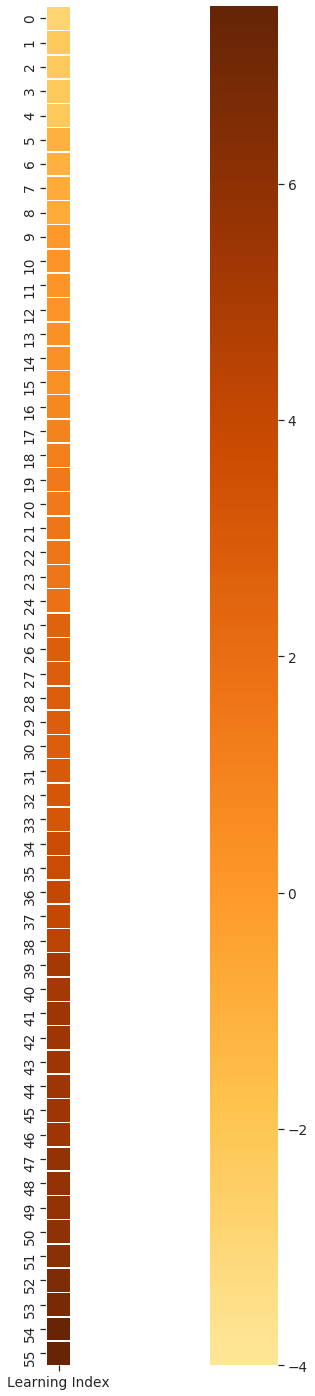

In [35]:
# Plot Learner Index data with no annotations inside cells

#Set up Matplotlib figure
f,ax = plt.subplots(figsize=(50,25))

# Plotting the heatmap with the correct aspect ratio
sns.heatmap(data, linewidths=0.5, linecolor = 'white', center=0, vmin = -4, cmap = "YlOrBr", vmax = 7.5, square=True, cbar_kws={'shrink':1})

#Save figure as svg
plt.savefig ('Heatmap_shap_LSTM_LI_no annot.svg', format = 'svg')